# *Montando o Drive (Diretório)*


In [5]:
#Carregando o seu Drive
from google.colab import drive
#Pedindo autorização para acessaar os arquivos
drive.mount("/content/drive")

Mounted at /content/drive


# Importando as *Bibliotecas*

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# *Abrindo os dados vindo do drive*


In [20]:
#Abrindo a Tabela com os dados em relação ao numero atribuido ao professor.
Dados = pd.read_excel("/content/drive/MyDrive/Analise de Dados - Python /Helber - Ultima Atividade - Observações 1 /Dados_25_PedroLucas.xlsx")
Dados

#Identificando as colunas e removendo as não usuais
Dados.columns
Dados.columns = ["Remover1","Remover2","Var_Independente1_TA","Var_Independente2_TB","Var_Dependente_Tref"]
Dados_1 = Dados.drop(columns=["Remover1","Remover2"])  #Arrumando colunas (Removi duas colunas indesejadas)
Dados_f = Dados_1.drop(0) # Dados finais arrumados ( Removida uma linha indesejada)
Dados_f_valores = Dados_f.values
print(Dados_f)



   Var_Independente1_TA Var_Independente2_TB Var_Dependente_Tref
1                   7.3                  7.5                 6.6
2                   7.6                  7.8                   7
3                   7.7                  7.9                   7
4                   7.8                    8                 7.1
5                   7.6                  7.8                 6.9
6                   7.6                  7.7                 6.8
7                   7.3                  7.5                 6.6
8                   6.9                  7.1                 6.2
9                   6.9                  7.1                 6.2
10                  6.9                  7.1                 6.2
11                  7.1                  7.3                 6.4
12                  6.9                  7.1                 6.2
13                  6.7                  6.9                 5.9
14                  6.7                  6.9                   6
15                  6.6  

#*Manipulando os dados e criação dos gráficos*

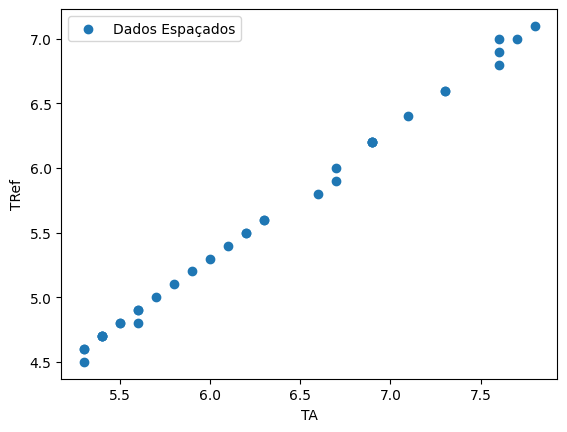

In [24]:
# Começando o grafico, indentificando os eixos 

x = Dados_f["Var_Independente1_TA"].values  #Eixo Conhecido 
y = Dados_f["Var_Dependente_Tref"].values   #Eixo de Referência


# Criando o graficos 

plt.scatter(x , y, label = "Dados Espaçados") ;
plt.xlabel("TA") ;
plt.ylabel("TRef") ;
plt.legend() ;


#*Ajuste Linear dos Dados espalhados*






A Acuracia do ajuste foi de = 1.00
Coeficiente angular(m) = 1.00
Coeficiente linear(n) = -0.74


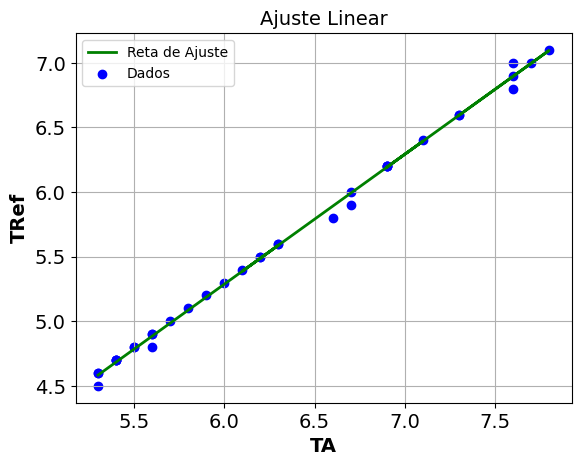

In [25]:
#Criando uma linha de ajuste linear 
 
from sklearn.linear_model import LinearRegression

Ajuste = LinearRegression() 
x = x.reshape(-1,1) # redemensiona os dados para trabalhar com a biblioteca
Ajuste.fit(x,y) #Pegando melhores valores possíveis


Acuracia_Ajuste = Ajuste.score(x,y) #O quao bem feito foi a linearização dos pontos fornecidos, aproximando
print("A Acuracia do ajuste foi de = {:0.2f}".format(Acuracia_Ajuste))

#Coeficientes da reta
a = Ajuste.coef_[0] #Coeficiente Angular 
b = Ajuste.intercept_ #Coeficiente Linear 
print("Coeficiente angular(m) = {:0.2f}".format(a))
print("Coeficiente linear(n) = {:0.2f}".format(b))

# Criação da reta 
reta = a*x + b

# Comando para determinar o tamanho segundo o qual os textos grafados no gráfico serão impressos na tela:
SMALL_SIZE = 14                        
MEDIUM_SIZE = 20                       
BIGGER_SIZE = 20   
plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)     
plt.rc('axes', labelsize=SMALL_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)    
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  

#Vizualização do Gráfico contendo reta e dados 

plt.scatter(x , y, label = "Dados", color="blue") ;
plt.plot(x,reta,label="Reta de Ajuste",color="green",linewidth=2)
plt.title("Ajuste Linear")
plt.grid(True)
plt.style.use("default")
plt.xlabel("TA",weight="bold") ;
plt.ylabel("TRef", weight="bold") ;
plt.legend() ;
plt.savefig("Ajuste_Linear_TA.png", dpi=500)




#*Correção e Salvando os Dados*



In [26]:
# Adicionando a correção

ta = (x*a)+b
print(ta)

#Salvando os dados em uma planilha do excel
Planilhas_dados_corrigidos = pd.DataFrame({"TA corrigido":[ta],"Coeficiente Angular":[a], "Coeficiente Linear":[b],"Acurracia":Acuracia_Ajuste})
with pd.ExcelWriter("Dados_Finais.xlsx") as writer:
  Planilhas_dados_corrigidos.to_excel(writer, sheet_name = "Ta_corrigido")
  writer.save()







[[6.593320189644649]
 [6.894672111909118]
 [6.995122752663942]
 [7.095573393418765]
 [6.894672111909118]
 [6.894672111909118]
 [6.593320189644649]
 [6.191517626625356]
 [6.191517626625356]
 [6.191517626625356]
 [6.392418908135002]
 [6.191517626625356]
 [5.9906163451157095]
 [5.9906163451157095]
 [5.890165704360886]
 [5.387912500586769]
 [5.488363141341593]
 [5.588813782096416]
 [5.588813782096416]
 [5.488363141341593]
 [5.2874618598319465]
 [5.1870112190771245]
 [5.086560578322301]
 [4.986109937567478]
 [4.885659296812654]
 [4.885659296812654]
 [4.885659296812654]
 [4.785208656057831]
 [4.785208656057831]
 [4.684758015303008]
 [4.684758015303008]
 [4.684758015303008]
 [4.684758015303008]
 [4.584307374548184]
 [4.584307374548184]
 [4.584307374548184]]
